***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/spk-core-certified-user/blob/main/README.md) >

## Splunk
###### Topic: ``Core Certified User``
***

<a id="top"></a>
***
## Table of Contents
***

### [Search Optimization](#SearchOptimization) <br/><br/>

- [Tstats Command](SearchOptimization#g) <br/><br/>

<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="SearchOptimization"></a>
***
### Search Optimization
***

< [Table of Contents](#top) | [References](#references) >
<a id="SearchOptimizationg"></a>
***
###### ``| tstats``
***

Splunk provides the ``tstats`` command for generating statistics from TSIDX files. 

The ``tstats`` command is a generating command that will generate statistics from either indexed fields found in TSIDX files, or fields defined in a data model. 

It requires the use of a statistical function and has a number of additional clauses. 

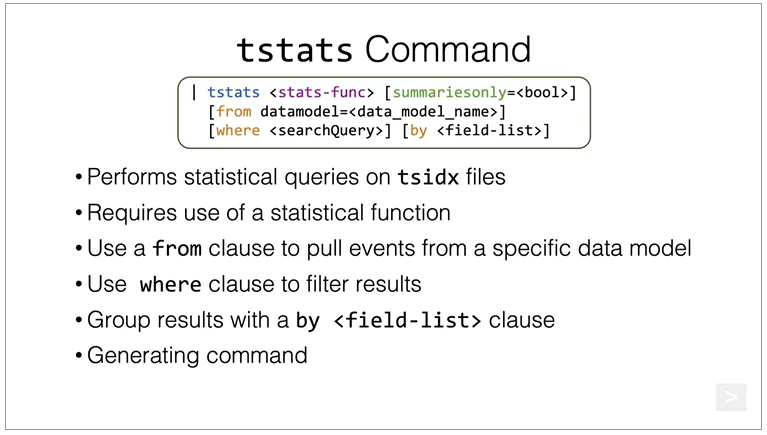

When using the ``tstats`` command to access indexed data, it's relegated to only using data found in TSIDX files, which means it can only use indexed fields but this also means the command is very fast. 

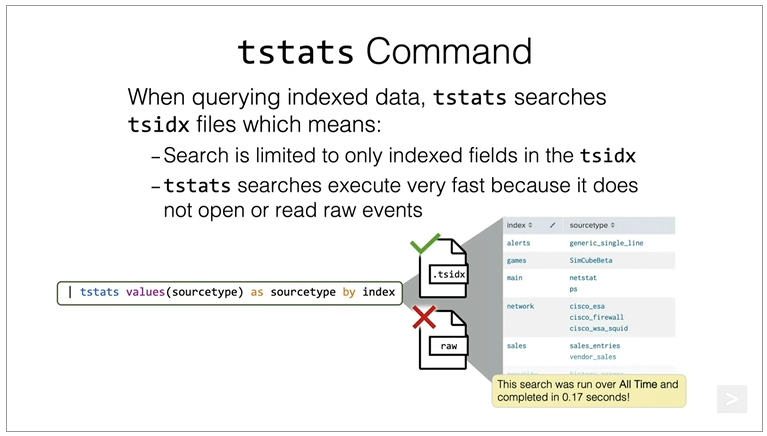

It requires the use of a statistical function. 

Most of the functions are those that are found in the ``stats`` command, but not all ``stats`` functions are available to ``tstats``. 

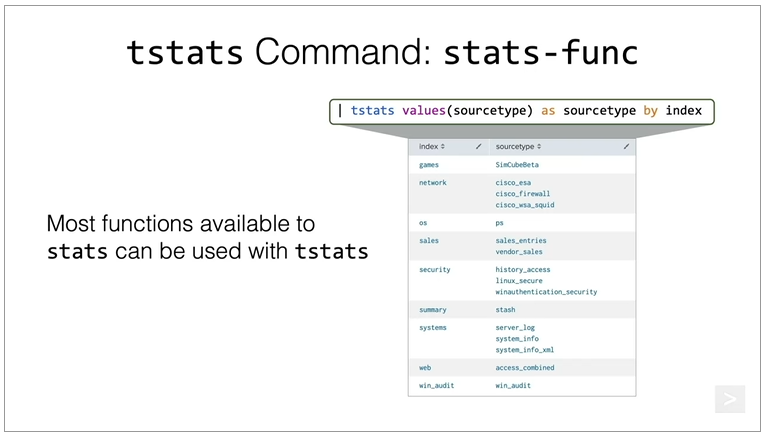

The ``from`` clause is used when you want to access data through a ``datamodel``, giving the ``tstats`` command access to the fields of that data model. 

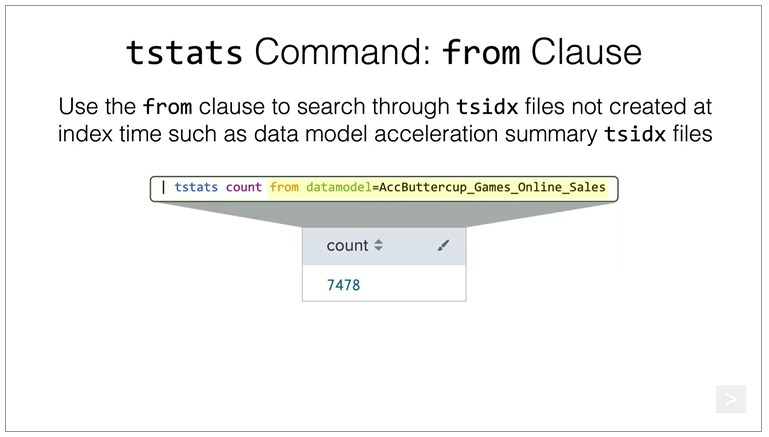

Without access to the data model, ``tstats`` could only, again, access fields found in the TSIDX files of the main index, that is, just indexed fields. 

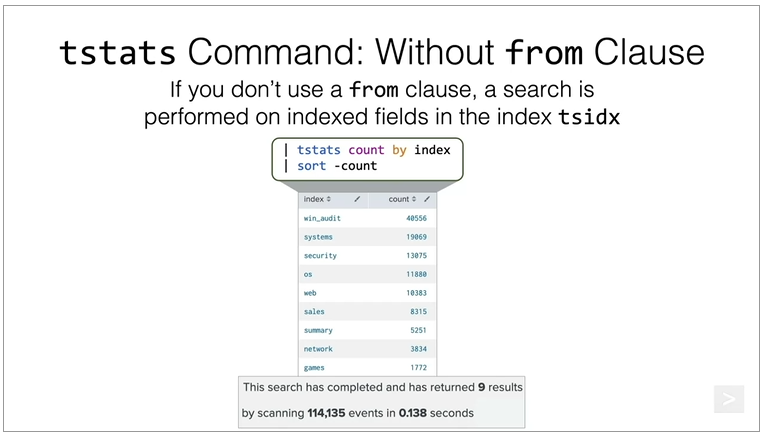

The ``by`` clause is used to group the statistics by the values of the specified fields in the by clause. 

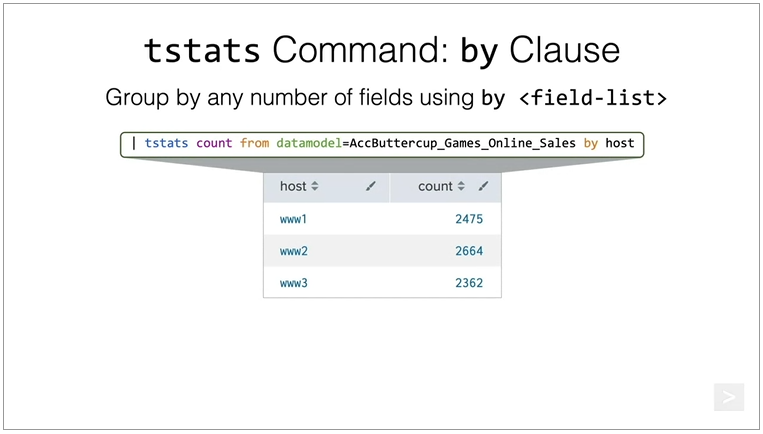

If you are accessing data from a data model, you have the option of using and forcing ``tstats`` to use just the acceleration summaries if the data model is an accelerated data model.

Specifying ``summariesonly=true`` forces the ``tstats`` command to only look at data that is covered by the acceleration summaries. 

Using ``summariesonly=false`` allows ``tstats`` to actually access data from the raw data. 

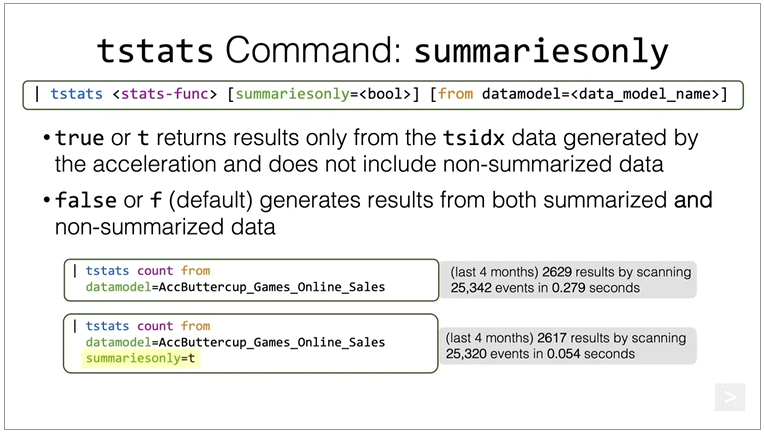

When you use the ``summariesonly`` option and you're accessing a data model that's not accelerated, then you get no results.

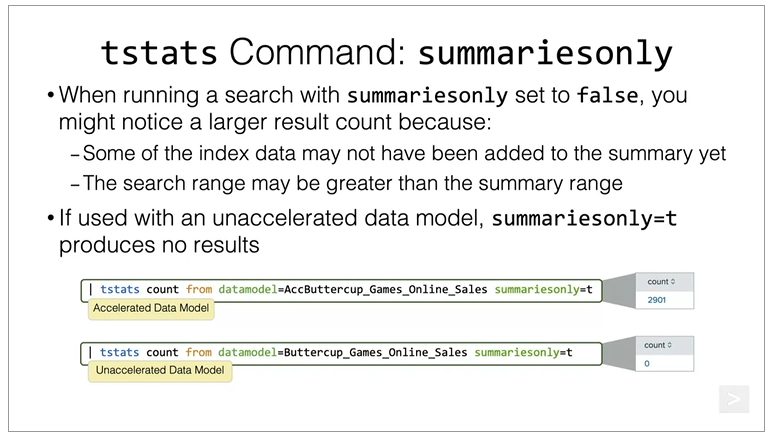

When you use a data model and you wish to access the fields of that data model, you have to prefix the name of the field with the dataset that the field was defined in. 

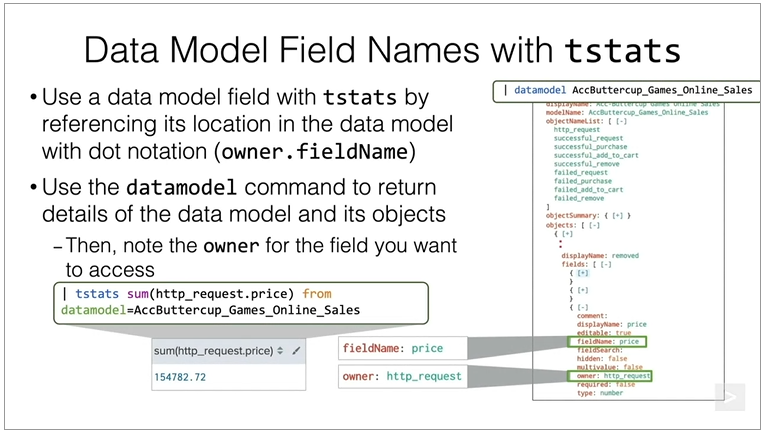

Also have the ability to specify, as part of the ``from`` syntax, the dataset in question, but there are certain rules about that dataset. 

First off, it has to be a root data set and if your data model has multiple root data sets, it's a best practice to always specifically identify both in the ``from`` clause and in other accesses to those fields the dataset the field came from.

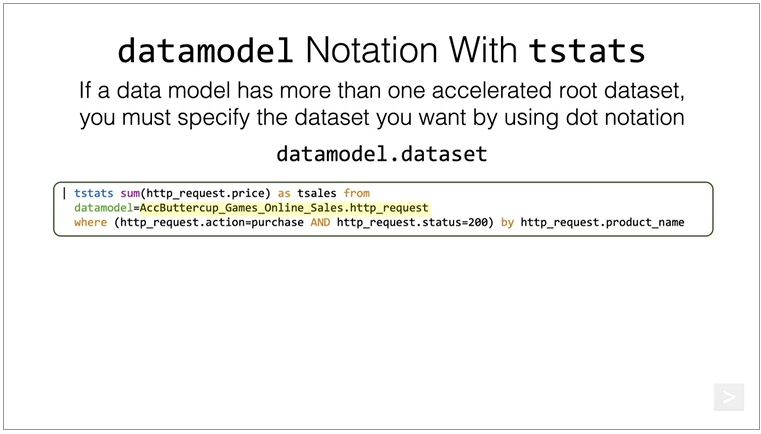

Taking a look at using the ``tstats`` command.

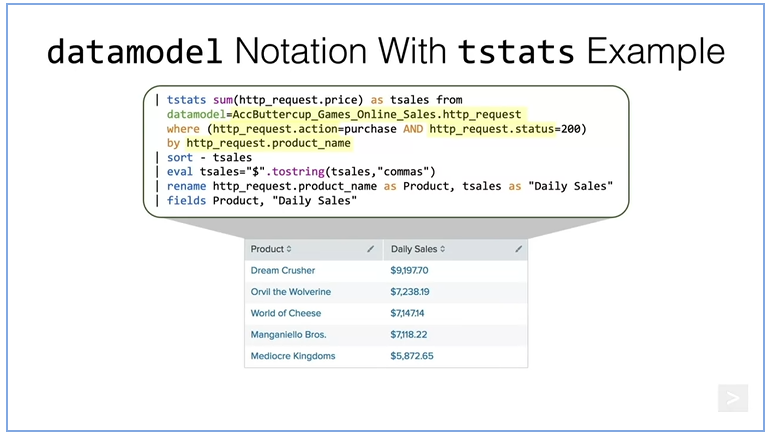

> Demonstration

``WIP``

> Recap

The ``tstats`` command can work with and without data models.

Used ``tstats`` without the benefit of a data model - relegated to just using fields that are specified in the TSDIX Files of the index - that is, indexed fields. 

On the other hand, when you specify a data model, you have access to the fields of that data model, but you have to prefix those fields with their datasets if you use them in the ``by`` clause. 

Though it was not demonstrated - you have the ability to go out and use it in the ``where`` clause.

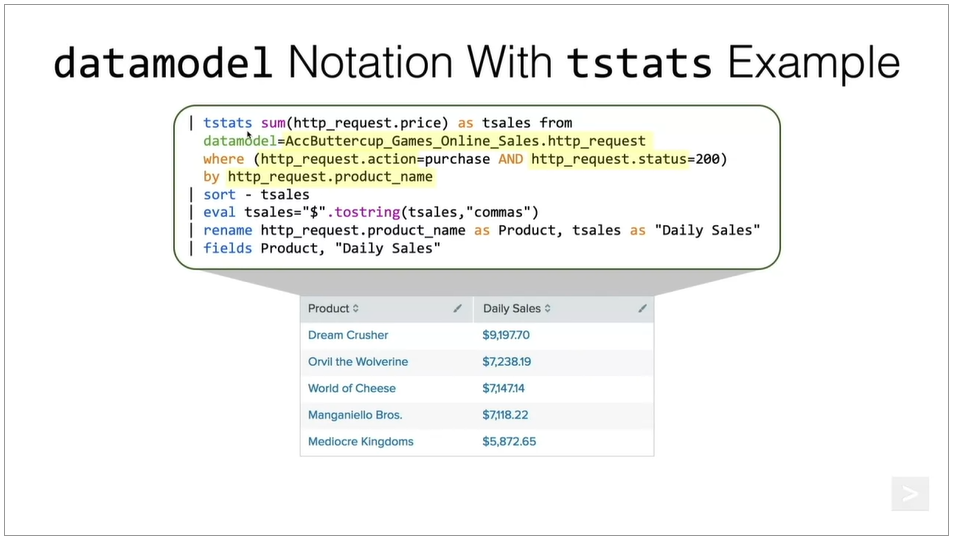

Can use ``tstats`` to search both accelerated and unaccelerated data models, but there's a performance gain to using ``tstats`` with accelerated data models. 

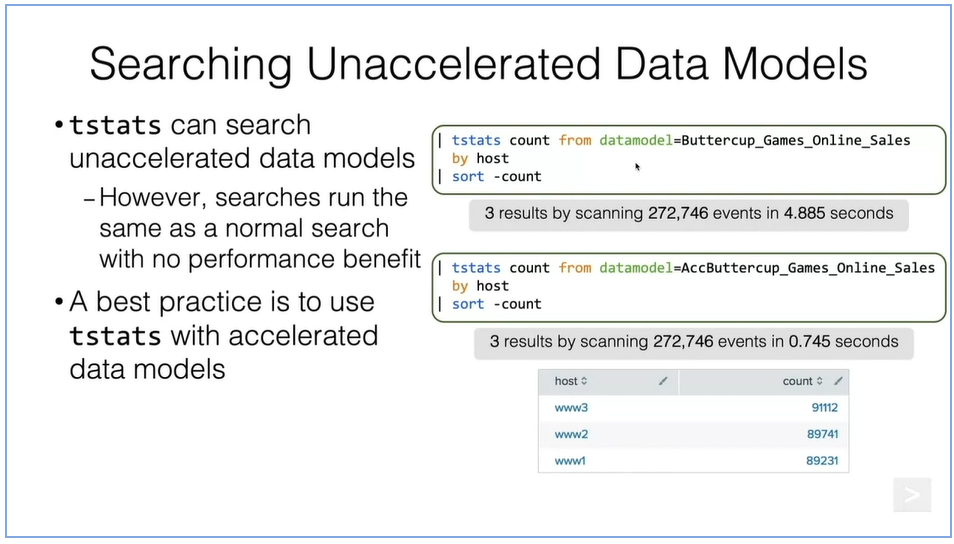

If we group our statistics by ``_time``, ``tstats`` behaves like the ``timechart`` command.

If I don't specify a range, ``tstats`` will dynamically, like ``timechart``, choose a dynamic time span. 

A five minute time range would be five second time spans, whereas a 24 hour time range we saw was a 30 minute time span, and a seven day time range produced a one day time span but as demonstrated, you can overwrite that with the ``span`` option.

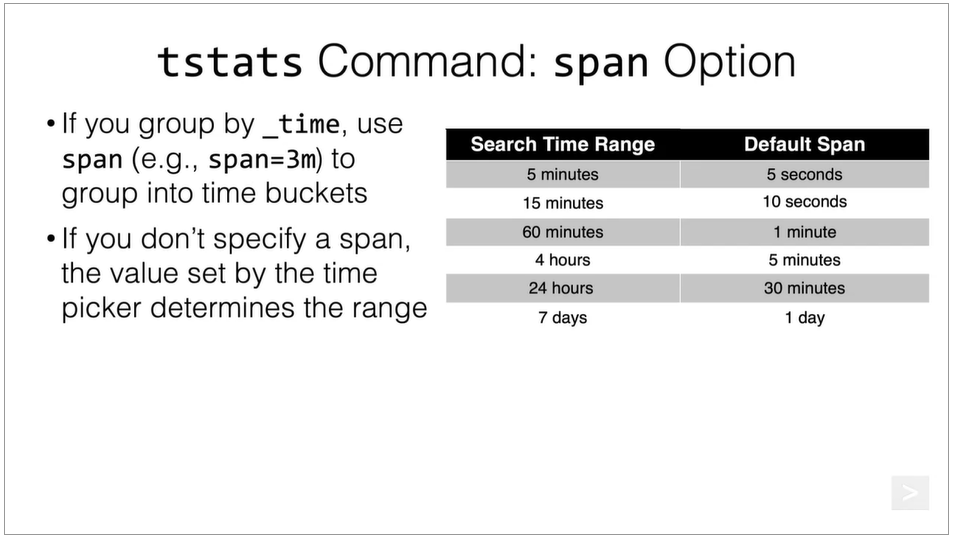

Another thing to note that's a difference between ``stats`` and ``tstats`` is that you can only use wildcards for field values. 

The ``stats`` command allows me to use wildcards in various parts of the syntax where we specify a wildcarded field name. 

**Wildcarded field names are absolutely not allowed in this ``tstats`` command.**

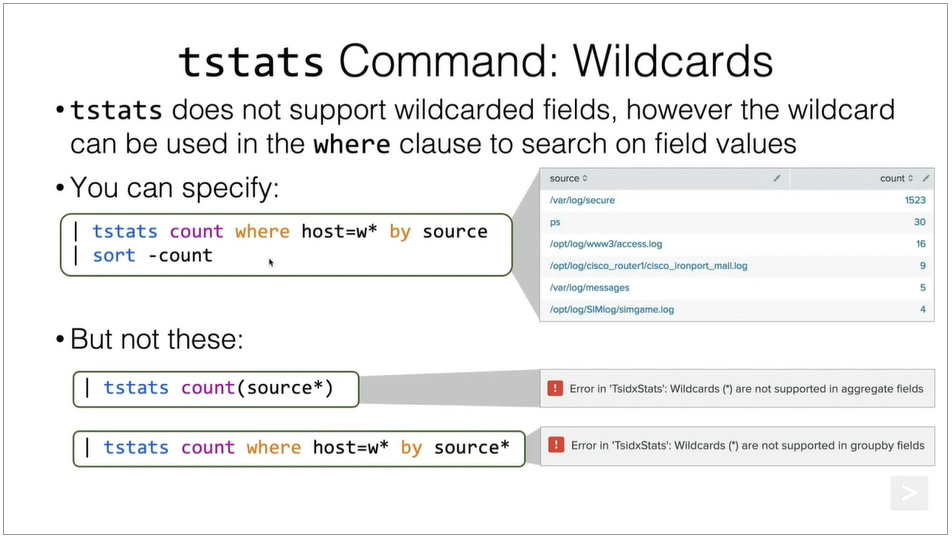

When you're running searches that are accessing just indexed fields and you're using the ``stats`` command, think about doing a ``tstats`` instead - performance benefits can be phenomenal. 

In each of these cases, we have a regular ``stats`` version of the search and it's ``tstats`` version and as you can see, 0.08 seconds for the ``tstats`` version, 1.59 seconds for the stats version. 

The performance gains are very significant.

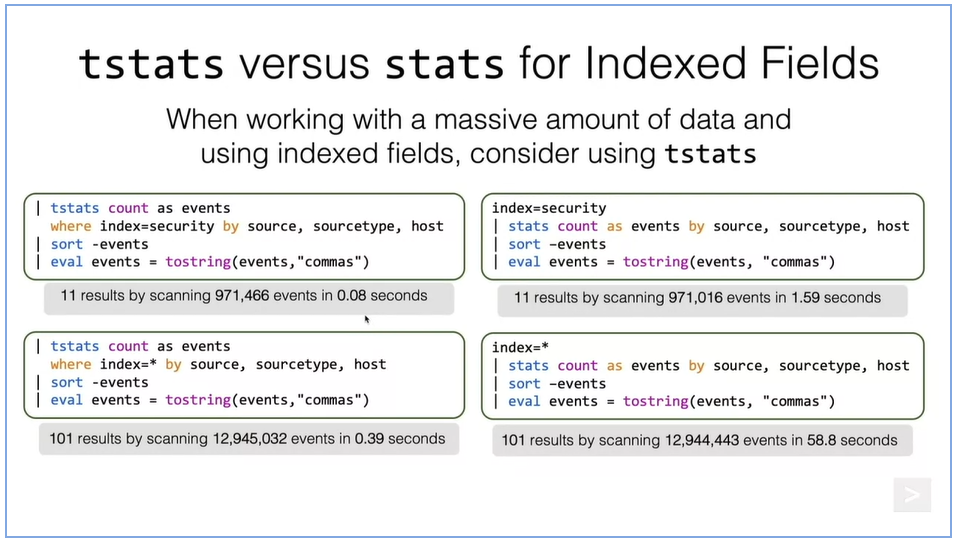

Because of this, there are going to be certain syntaxes in SPL that Splunk will attempt to convert to a ``tstats`` - For example, if you are using the datamodel command and piping that through a ``stats`` command, Splunk will actually convert that and run the ``tstats`` version of that command. 

There is also a similar option available for simple ``stats`` to ``tstats``, but this optimization is not on by default - actually turned off. But you can go ahead and turn it on (should say your administrator can enable this particular optimization). 

The reason this optimization is not turned on by default is that it has a negative effect on something called summary indexing. When you install Splunk for the first time, we don't know if that site is going to be using summary indexing or not. 

As such, we have this ``stats`` to ``tstats`` optimization disabled out of the box. If you are not going to be using summary indexing, then you might think about enabling this particular optimization. Both of these optimizations are enabled in a configuration file called ``limits.conf``.

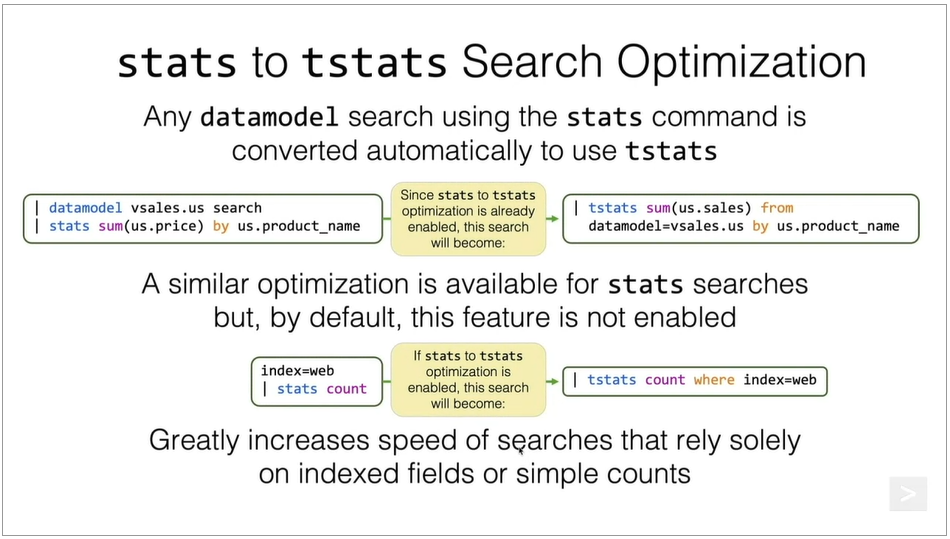

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Splunk, "Splunk Education Portal," [education.splunk.com](https://education.splunk.com/), n.d..

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

[ [Summary Indexing](https://docs.splunk.com/Documentation/Splunk/latest/Knowledge/Usesummaryindexing) ]

[ [Splunk How-To: Summary Indexing](https://education.splunk.com/elearning/summary-indexing-in-splunk) ]

***
## END

In [1]:
from IPython.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK